In [1]:
import sys
sys.path.insert(0, "../../torchdriveenv")

In [2]:
import cv2
import io
import os
import pickle
import random
import torch
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

In [3]:
def get_value(key, step_data):
    if key == "obs_birdview":
        return step_data.obs_birdview.squeeze()
    if key == "recurrent_state":
        return torch.Tensor(step_data.recurrent_states[0]).squeeze() # .cuda()
    if key == "action":
        return step_data.ego_action.squeeze()

In [4]:
def to_video(pil_images, fps=10):

    # Convert PIL images to numpy arrays
    frames = [np.array(img) for img in pil_images]

    # Get frame size (height, width)
    height, width, layers = frames[0].shape
    size = (width, height)

    # Use in-memory buffer for video
    output_buffer = io.BytesIO()

    # Define video writer using OpenCV and FFMPEG with memory buffer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter("output.mp4",
                                    fourcc, fps, size)

    for frame in frames:
        bgr_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        video_writer.write(bgr_frame)

    video_writer.release()

    output_buffer.seek(0)  # Reset buffer position to the start
    return output_buffer

In [5]:
def to_image(plt):
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=50)
    buf.seek(0)
    plt.close()
    return Image.open(buf)


def plot_samples(x):
    x = x.cpu().numpy()
    plt.scatter(x[1], x[0])
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    return to_image(plt)

In [6]:
def visualize_episode(file_path):
    obs_birdviews = []
    actions = []
    action_images = []
    with open(file_path, "rb") as f:
        episode_data = pickle.load(f)
    print(episode_data)
    if episode_data.step_data[-1].reached_waypoint_num <= 2:
        print("too short")
        return
    else:
    for step_data in episode_data.step_data:
        obs_birdviews.append(get_value("obs_birdview", step_data))
        action = get_value("action", step_data)
        actions.append(action)
        action_images.append(plot_samples(action)) # .append(get_value("action", step_data))
        
    return [Image.fromarray(img.astype(np.uint8).transpose(1, 2, 0), 'RGB') for img in obs_birdviews], \
            action_images, actions

In [7]:
data_dir = "../data/waypoint_graph_no_rendering_test"
file_paths = [os.path.join(data_dir, file) for file in os.listdir(data_dir)]
# file_paths

In [ ]:
for i in range(100):
    file_path = random.choice(file_paths)
    with open(file_path, "rb") as f:
        episode_data = pickle.load(f)
#     print(episode_data)
    if episode_data.step_data[-1].reached_waypoint_num <= 2:
        print("too short")
    else:
        print(episode_data.step_data[-1].reached_waypoint_num, ' ', file_path)

In [8]:
file_path = random.choice(file_paths)
file_path 

'../data/waypoint_graph_no_rendering_test/episode_7_6932.pkl'

In [9]:
# file_path = '../data/waypoint_graph_no_rendering_test/episode_9_95910.pkl'

In [10]:
# !ls -l ../data/itra_data/episode_2367_13523.pkl

In [11]:
obs_images, action_images, actions = visualize_episode(file_path)

/home/kezhang/work/stochastic-critic/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Commercial access denied and fallback to check for academic access.
/home/kezhang/work/stochastic-critic/.venv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via t

EpisodeData(location='carla_Town03', step_data=[StepData(obs_birdview=array([[[[[ 80.,  80.,  80., ...,   0.,   0.,   0.],
          [155., 155., 155., ...,   0.,   0.,   0.],
          [155., 155., 155., ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.]],

         [[127., 127., 127., ...,   0.,   0.,   0.],
          [155., 155., 155., ...,   0.,   0.,   0.],
          [155., 155., 155., ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.]],

         [[ 86.,  86.,  86., ...,   0.,   0.,   0.],
          [155., 155., 155., ...,   0.,   0.,   0.],
          [155., 155., 155., ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,

In [12]:
to_video(obs_images)

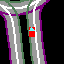

In [13]:
obs_images[0]

In [14]:
actions

[tensor([0.0096, 0.0133], device='cuda:0'),
 tensor([0.0108, 0.0134], device='cuda:0'),
 tensor([0.0200, 0.0142], device='cuda:0'),
 tensor([0.0198, 0.0149], device='cuda:0'),
 tensor([0.0199, 0.0155], device='cuda:0'),
 tensor([0.0200, 0.0161], device='cuda:0'),
 tensor([0.0199, 0.0166], device='cuda:0'),
 tensor([0.0199, 0.0170], device='cuda:0'),
 tensor([0.0199, 0.0174], device='cuda:0'),
 tensor([0.0199, 0.0178], device='cuda:0'),
 tensor([0.0199, 0.0181], device='cuda:0'),
 tensor([0.0200, 0.0183], device='cuda:0'),
 tensor([0.0199, 0.0185], device='cuda:0'),
 tensor([0.0198, 0.0187], device='cuda:0'),
 tensor([0.0200, 0.0188], device='cuda:0'),
 tensor([0.0199, 0.0189], device='cuda:0'),
 tensor([0.0200, 0.0189], device='cuda:0'),
 tensor([0.0198, 0.0189], device='cuda:0'),
 tensor([0.0199, 0.0189], device='cuda:0'),
 tensor([0.0200, 0.0189], device='cuda:0'),
 tensor([0.0199, 0.0188], device='cuda:0'),
 tensor([0.0199, 0.0187], device='cuda:0'),
 tensor([0.0199, 0.0186], device

In [15]:
np.argmax(torch.stack(actions).cpu(), axis=0)

tensor([160, 142])

In [16]:
np.argmin(torch.stack(actions).cpu(), axis=0)

tensor([142, 144])

In [17]:
actions[11]

tensor([0.0200, 0.0183], device='cuda:0')

In [18]:
# actions[97]

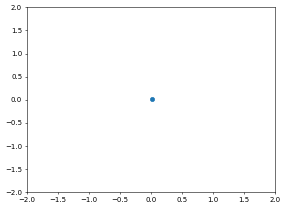

In [19]:
action_images[11]

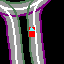

In [20]:
obs_images[11]

In [21]:
obs_images[0].save('test_obs.gif',
                   save_all=True, append_images=obs_images[1:], optimize=False, duration=40, loop=0)

In [22]:
action_images[0].save('test_action.gif',
                      save_all=True, append_images=action_images[1:], optimize=False, duration=40, loop=0)